In [37]:
import pandas as pd
import math

In [38]:
df = pd.read_csv('C:/Users/hp/Desktop/Dublin Business School/Assements/Machine Learning/Assessment/CA2_task1/Data_Frame.csv')
df

,Age,Hair_Size,Brown_Eye,Sex,Won
0,youth,long,no,male,no
1,youth,long,no,female,no
2,middle_age,long,no,male,yes
3,senior,medium,no,male,yes
4,senior,short,yes,male,yes
5,senior,short,yes,female,no
6,middle_age,short,yes,female,yes
7,youth,medium,no,male,no
8,youth,short,yes,male,yes
9,senior,medium,yes,male,yes


In [39]:
# GENERAL ENTROPY E(S)
# we have 9 yes, 5 no thats why we chose 9/14 and 5/14
E_S = -((9/14) * math.log2(9/14) + (5/14) * math.log2(5/14))
print(f"E(S): {E_S:.2}")

E(S): 0.94


In [40]:
# E(S,Age) Data Frame
df_age_won = pd.crosstab(df['Age'],df['Won'])
df_age_won

Won,no,yes
Age,,
middle_age,0,4
senior,2,3
youth,3,2


In [41]:
# E(S,Age)
E_S_Age = (4/14)*0 + (5/14)*((-3/5)*math.log2(3/5)-(2/5)*math.log2(2/5)) + (5/14)*((-3/5)*math.log2(3/5)-(2/5)*math.log2(2/5))
print(f"E(S_AGE): {E_S_Age:.2}")

E(S_AGE): 0.69


In [42]:
# E(S,Hair_Size) Data Frame
df_hs_won = pd.crosstab(df['Hair_Size'],df['Won'])
df_hs_won

Won,no,yes
Hair_Size,,
long,2,2
medium,2,4
short,1,3


In [43]:
E_S_HS = (4/14)*((-2/4)*math.log2(2/4)-(2/4)*math.log2(2/4)) + (6/14)*((-2/6)*math.log2(2/6)-(4/6)*math.log2(4/6)) + (4/14)*((-1/4)*math.log2(1/4)-(3/4)*math.log2(3/4))
print(f"E(S_HairSize): {E_S_HS:.2}")

E(S_HairSize): 0.91


In [44]:
# E(S,Brown_Eye) Data Frame
df_brown_eye = pd.crosstab(df['Brown_Eye'],df['Won'])
df_brown_eye

Won,no,yes
Brown_Eye,,
no,4,3
yes,1,6


In [45]:
# E(S,Brown_Eye)
E_S_BE = (7/14)*((-4/7)*math.log2(4/7)-(3/7)*math.log2(3/7)) + (7/14)*((-1/7)*math.log2(1/7)-(6/7)*math.log2(6/7))
print(f"E(S_BrownEye): {E_S_BE:.2}")

E(S_BrownEye): 0.79


In [46]:
# E(S,Sex) Data Frame
df_sex = pd.crosstab(df['Sex'],df['Won'])
df_sex

Won,no,yes
Sex,,
female,3,3
male,2,6


In [47]:
# E(S,Sex)
E_S_sex = (6/14)*((-3/6)*math.log2(3/6)-(3/6)*math.log2(3/6)) + (8/14)*((-2/8)*math.log2(2/8)-(6/8)*math.log2(6/8))
print(f"E(S_sex): {E_S_sex:.2}")

E(S_sex): 0.89


In [48]:
# SUMMARY OF ENTROPIES
print(f"E(S): {E_S:.2}")
print(f"E(S_AGE): {E_S_Age:.2}")
print(f"E(S_HairSize): {E_S_HS:.2}")
print(f"E(S_BrownEye): {E_S_BE:.2}")
print(f"E(S_sex): {E_S_sex:.2}")

E(S): 0.94
E(S_AGE): 0.69
E(S_HairSize): 0.91
E(S_BrownEye): 0.79
E(S_sex): 0.89


In [49]:
# GAIN INFORMATION
IG_Age = E_S - E_S_Age
print(f"E(IG_Age): {IG_Age:.2}")
IG_HS = E_S - E_S_HS
print(f"E(IG_Hairsize): {IG_HS:.2}")
IG_BE = E_S - E_S_BE
print(f"E(IG_BE): {IG_BE:.2}")
IG_Sex = E_S - E_S_sex
print(f"E(IG_Hairsize): {IG_Sex:.2}")

E(IG_Age): 0.25
E(IG_Hairsize): 0.029
E(IG_BE): 0.15
E(IG_Hairsize): 0.048


A- The most important feature is 'Age', because it has the largest information gain

In [50]:
# SORT DATA FRAME FOR AGE
df_Age = df.sort_values(by='Age')
df_Age

,Age,Hair_Size,Brown_Eye,Sex,Won
2,middle_age,long,no,male,yes
6,middle_age,short,yes,female,yes
11,middle_age,medium,no,female,yes
12,middle_age,long,yes,male,yes
3,senior,medium,no,male,yes
4,senior,short,yes,male,yes
5,senior,short,yes,female,no
9,senior,medium,yes,male,yes
13,senior,medium,no,female,no
0,youth,long,no,male,no


In [51]:
# DATA FRAME OF youth
df_Age.tail()

,Age,Hair_Size,Brown_Eye,Sex,Won
0,youth,long,no,male,no
1,youth,long,no,female,no
7,youth,medium,no,male,no
8,youth,short,yes,male,yes
10,youth,medium,yes,female,yes


In [52]:
# Calculate Parent Entropy E(youth)
E_youth = (-(3/5)*math.log2(3/5)-(2/5)*math.log2(2/5))
print(f"E(youth): {E_youth:.2}")

E(youth): 0.97


In [53]:
# Create a data_frame youth,hair_size,won
df_hs_won = {
    'Hair_Size' : ['long','long','medium','short','medium'],
    'Won' : ['no','no','no','yes','yes']}
df_hs_won = pd.DataFrame(df_hs_won)
# Crosstab of Hair_Size - Won
df_hs_won = pd.crosstab(df_hs_won['Hair_Size'],df_hs_won['Won'])
df_hs_won

Won,no,yes
Hair_Size,,
long,2,0
medium,1,1
short,0,1


In [54]:
# E(Hair_Size,Won)
E_HS_Won = (2/5)*0 + (2/5)*((-1/2)*math.log2(1/2)-(1/2)*math.log2(1/2)) + 0*((-1/5))
print('E(Hairsize_Won) : ',E_HS_Won)

E(Hairsize_Won) :  0.4


In [55]:
# INFORMATION GAIN IG(E_HS_Won) = E(youth) - E_HS_Won
IG_E_HS_Won = E_youth - E_HS_Won
print('IG_HS_Won : ',IG_E_HS_Won)

IG_HS_Won :  0.5709505944546686


In [56]:
# SORT BROWN_EYE
df_be = df.sort_values(by='Brown_Eye')
df_be

,Age,Hair_Size,Brown_Eye,Sex,Won
0,youth,long,no,male,no
1,youth,long,no,female,no
2,middle_age,long,no,male,yes
3,senior,medium,no,male,yes
7,youth,medium,no,male,no
11,middle_age,medium,no,female,yes
13,senior,medium,no,female,no
4,senior,short,yes,male,yes
5,senior,short,yes,female,no
6,middle_age,short,yes,female,yes


In [57]:
# Create a data frame for Brown_eye - Won
df_be_won = {
    'Brown_Eye' : ['no','no','no','yes','yes'],
    'Won' : ['no','no','no','yes','yes']
    }
df_be_won = pd.DataFrame(df_be_won)
# Crosstab Brown_Eye - Won
df_be_won = pd.crosstab(df_be_won['Brown_Eye'],df_be_won['Won'])
df_be_won

Won,no,yes
Brown_Eye,,
no,3,0
yes,0,2


In [58]:
# E(youth_Brown_Eye)
E_youth_BE = (3/5)*0 + (2/5) * 0
print('E(youth,Browneye) : ',E_youth_BE)

E(youth,Browneye) :  0.0


In [59]:
# IG(youth,Brown_Eye)
IG_youth_BE = E_youth - E_youth_BE
print(f"IG(youth_BE): {IG_youth_BE:.2}")

IG(youth_BE): 0.97


In [60]:
# Create a data frame for Sex - Won
df_sex_won = {
    'Sex' : ['male','female','male','male','female'],
    'Won' : ['no','no','no','yes','yes']
    }
df_sex_won = pd.DataFrame(df_sex_won)
# Crosstab Sex - Won
df_sex_won = pd.crosstab(df_sex_won['Sex'],df_sex_won['Won'])
df_sex_won

Won,no,yes
Sex,,
female,1,1
male,2,1


In [61]:
# Calculate E(youth_sex)
E_youth_sex = (2/5)*((-1/2)*math.log2(1/2)-(1/2)*math.log2(1/2)) +  (3/5)*((-2/3)*math.log2(2/3)-(1/3)*math.log2(1/3))
print('E(youth,sex) : ',E_youth_sex)

E(youth,sex) :  0.9509775004326937


In [62]:
# IG_youth_Sex
IG_youth_Sex = E_youth - E_youth_sex
print(f"IG(youth_sex): {IG_youth_Sex:.2}")

IG(youth_sex): 0.02


In [63]:
# SUMMARY OF ENTROPIES AND INFORMATION GAIN BASED ON YOUTH
print('E(Hairsize_Won) : ',E_HS_Won)
print(f'IG_HS_Won : {IG_E_HS_Won:.2}')
print('E(youth,Browneye) : ',E_youth_BE)
print('IG(youth_BE): ',IG_youth_BE)
print(f'E(youth,sex) : {E_youth_sex:.2}')
print(f"IG(youth_sex): {IG_youth_Sex:.2}")

E(Hairsize_Won) :  0.4
IG_HS_Won : 0.57
E(youth,Browneye) :  0.0
IG(youth_BE):  0.9709505944546686
E(youth,sex) : 0.95
IG(youth_sex): 0.02


# Brown_Eye is the largest value.

In [64]:
df_Age[4:9]

,Age,Hair_Size,Brown_Eye,Sex,Won
3,senior,medium,no,male,yes
4,senior,short,yes,male,yes
5,senior,short,yes,female,no
9,senior,medium,yes,male,yes
13,senior,medium,no,female,no


In [65]:
# Calculate E(senior)
E_senior = (-(3/5)*math.log2(3/5)-(2/5)*math.log2(2/5))
print('E(senior) : ',E_senior)

E(senior) :  0.9709505944546686


In [66]:
# Create a data frame for Hair_Size - Won Under Senior
df_hairsize_won = {
    'Hair_Size' : ['medium','short','short','medium','medium'],
    'Won' : ['yes','yes','no','yes','no']
    }
df_hairsize_won = pd.DataFrame(df_hairsize_won)
# Crosstab Hairszie - Won
df_hairsize_won = pd.crosstab(df_hairsize_won['Hair_Size'],df_hairsize_won['Won'])
df_hairsize_won

Won,no,yes
Hair_Size,,
medium,1,2
short,1,1


In [67]:
# Calculate E(senior_hairsize)
E_senior_hairsize = (3/5)*((-1/3)*math.log2(1/3)-(2/3)*math.log2(2/3)) +  (2/5)*((-1/2)*math.log2(1/2)-(1/2)*math.log2(1/2))
print('E(senior,hairsize) : ',E_senior_hairsize)

E(senior,hairsize) :  0.9509775004326937


In [68]:
# Create a data frame for Brown_Eye - Won Under Senior
df_browneye_won = {
    'Brown_Eye' : ['no','yes','yes','yes','no'],
    'Won' : ['yes','yes','no','yes','no']
    }
df_browneye_won = pd.DataFrame(df_browneye_won)
# Crosstab Hairszie - Won
df_browneye_won = pd.crosstab(df_browneye_won['Brown_Eye'],df_browneye_won['Won'])
df_browneye_won

Won,no,yes
Brown_Eye,,
no,1,1
yes,1,2


In [69]:
# Calculate E(senior_browneye)
E_senior_browneye = (2/5)*((-1/2)*math.log2(1/2)-(1/2)*math.log2(1/2)) +  (3/5)*((-1/3)*math.log2(1/3)-(2/3)*math.log2(2/3))
print('E(senior,browneye) : ',E_senior_browneye)

E(senior,browneye) :  0.9509775004326937


In [70]:
# Create a data frame for Brown_Eye - Won Under Senior
df_sex_won = {
    'Sex' : ['Male','Male','Female','Male','Female'],
    'Won' : ['yes','yes','no','yes','no']
    }
df_sex_won = pd.DataFrame(df_sex_won)
# Crosstab Seni Won
df_sex_won = pd.crosstab(df_sex_won['Sex'],df_sex_won['Won'])
df_sex_won

Won,no,yes
Sex,,
Female,2,0
Male,0,3


In [71]:
# E(senior,sex)
E_sex_won = (2/5)*0 + 0*(3/5)
print('E(senior,sex)',E_sex_won)

E(senior,sex) 0.0


In [72]:
# SUMMARY OF ENTROPIES AND INFORMATION GAINS
print('E(senior) : ',E_senior,'\n')

print('E(senior,hairsize) : ',E_senior_hairsize)
IG_senior_hairsize = E_senior - E_senior_hairsize
print('IG(senior,hairsize) : ',IG_senior_hairsize,'\n' )
IG_senior_hairsize = E_senior - E_senior_hairsize

print('E(senior,browneye) : ',E_senior_browneye)
IG_senior_browneye = E_senior - E_senior_browneye
print('IG(senior,browneye) : ',IG_senior_hairsize,'\n' )

print('E(senior,sex)',E_sex_won)
IG_senior_sex = E_senior - E_sex_won
print('IG(senior,sex) : ',IG_senior_sex,'\n' )

E(senior) :  0.9709505944546686 

E(senior,hairsize) :  0.9509775004326937
IG(senior,hairsize) :  0.01997309402197489 

E(senior,browneye) :  0.9509775004326937
IG(senior,browneye) :  0.01997309402197489 

E(senior,sex) 0.0
IG(senior,sex) :  0.9709505944546686 



# B-) The best Information Gain is IG(youth,brown eye) or IG(senior,sex) they have same Information Gain

# The largest information is Sex for Senior

# DECISION TREE

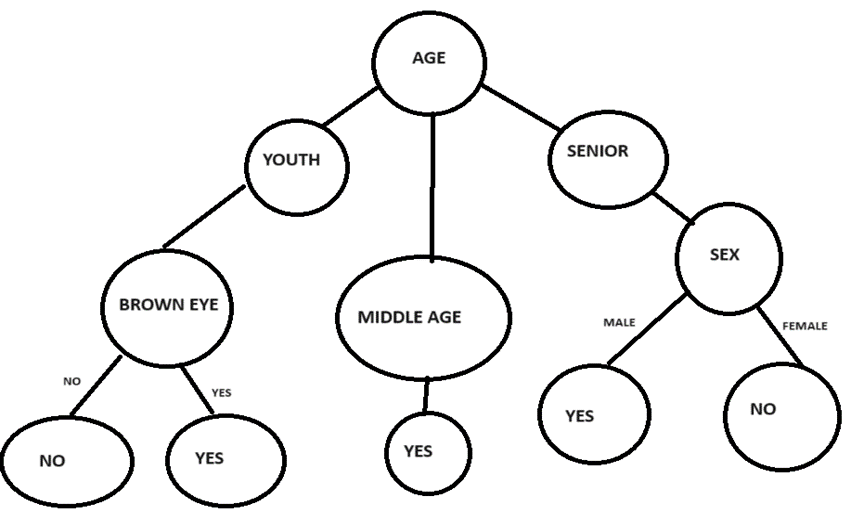